# CHALLENGE: Retail Store Sales' drivers

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Clothing.csv')
df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [ ]:
df.describe()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,6334.751278,38.774230,1.283796,2.069384,1.565539,1.389747,121.137500,18.955044,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,3739.343624,5.218184,0.639773,1.015598,0.705999,0.394514,64.435343,7.343363,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,300.000000,16.000000,1.000000,1.000000,1.000000,1.000000,32.000000,5.707966,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,3904.200000,37.000000,1.000000,1.923100,1.283300,1.333300,80.000000,13.541198,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,5278.935000,39.000000,1.000000,1.955600,1.283300,1.367300,104.000000,17.744585,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,7739.899250,41.000000,1.295225,2.066400,2.000000,1.367300,145.250000,24.302982,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,27000.000000,66.000000,10.000000,8.000000,9.000000,4.000000,582.000000,43.326020,1.500000e+06,400000.000000,1214.000000,90.000000


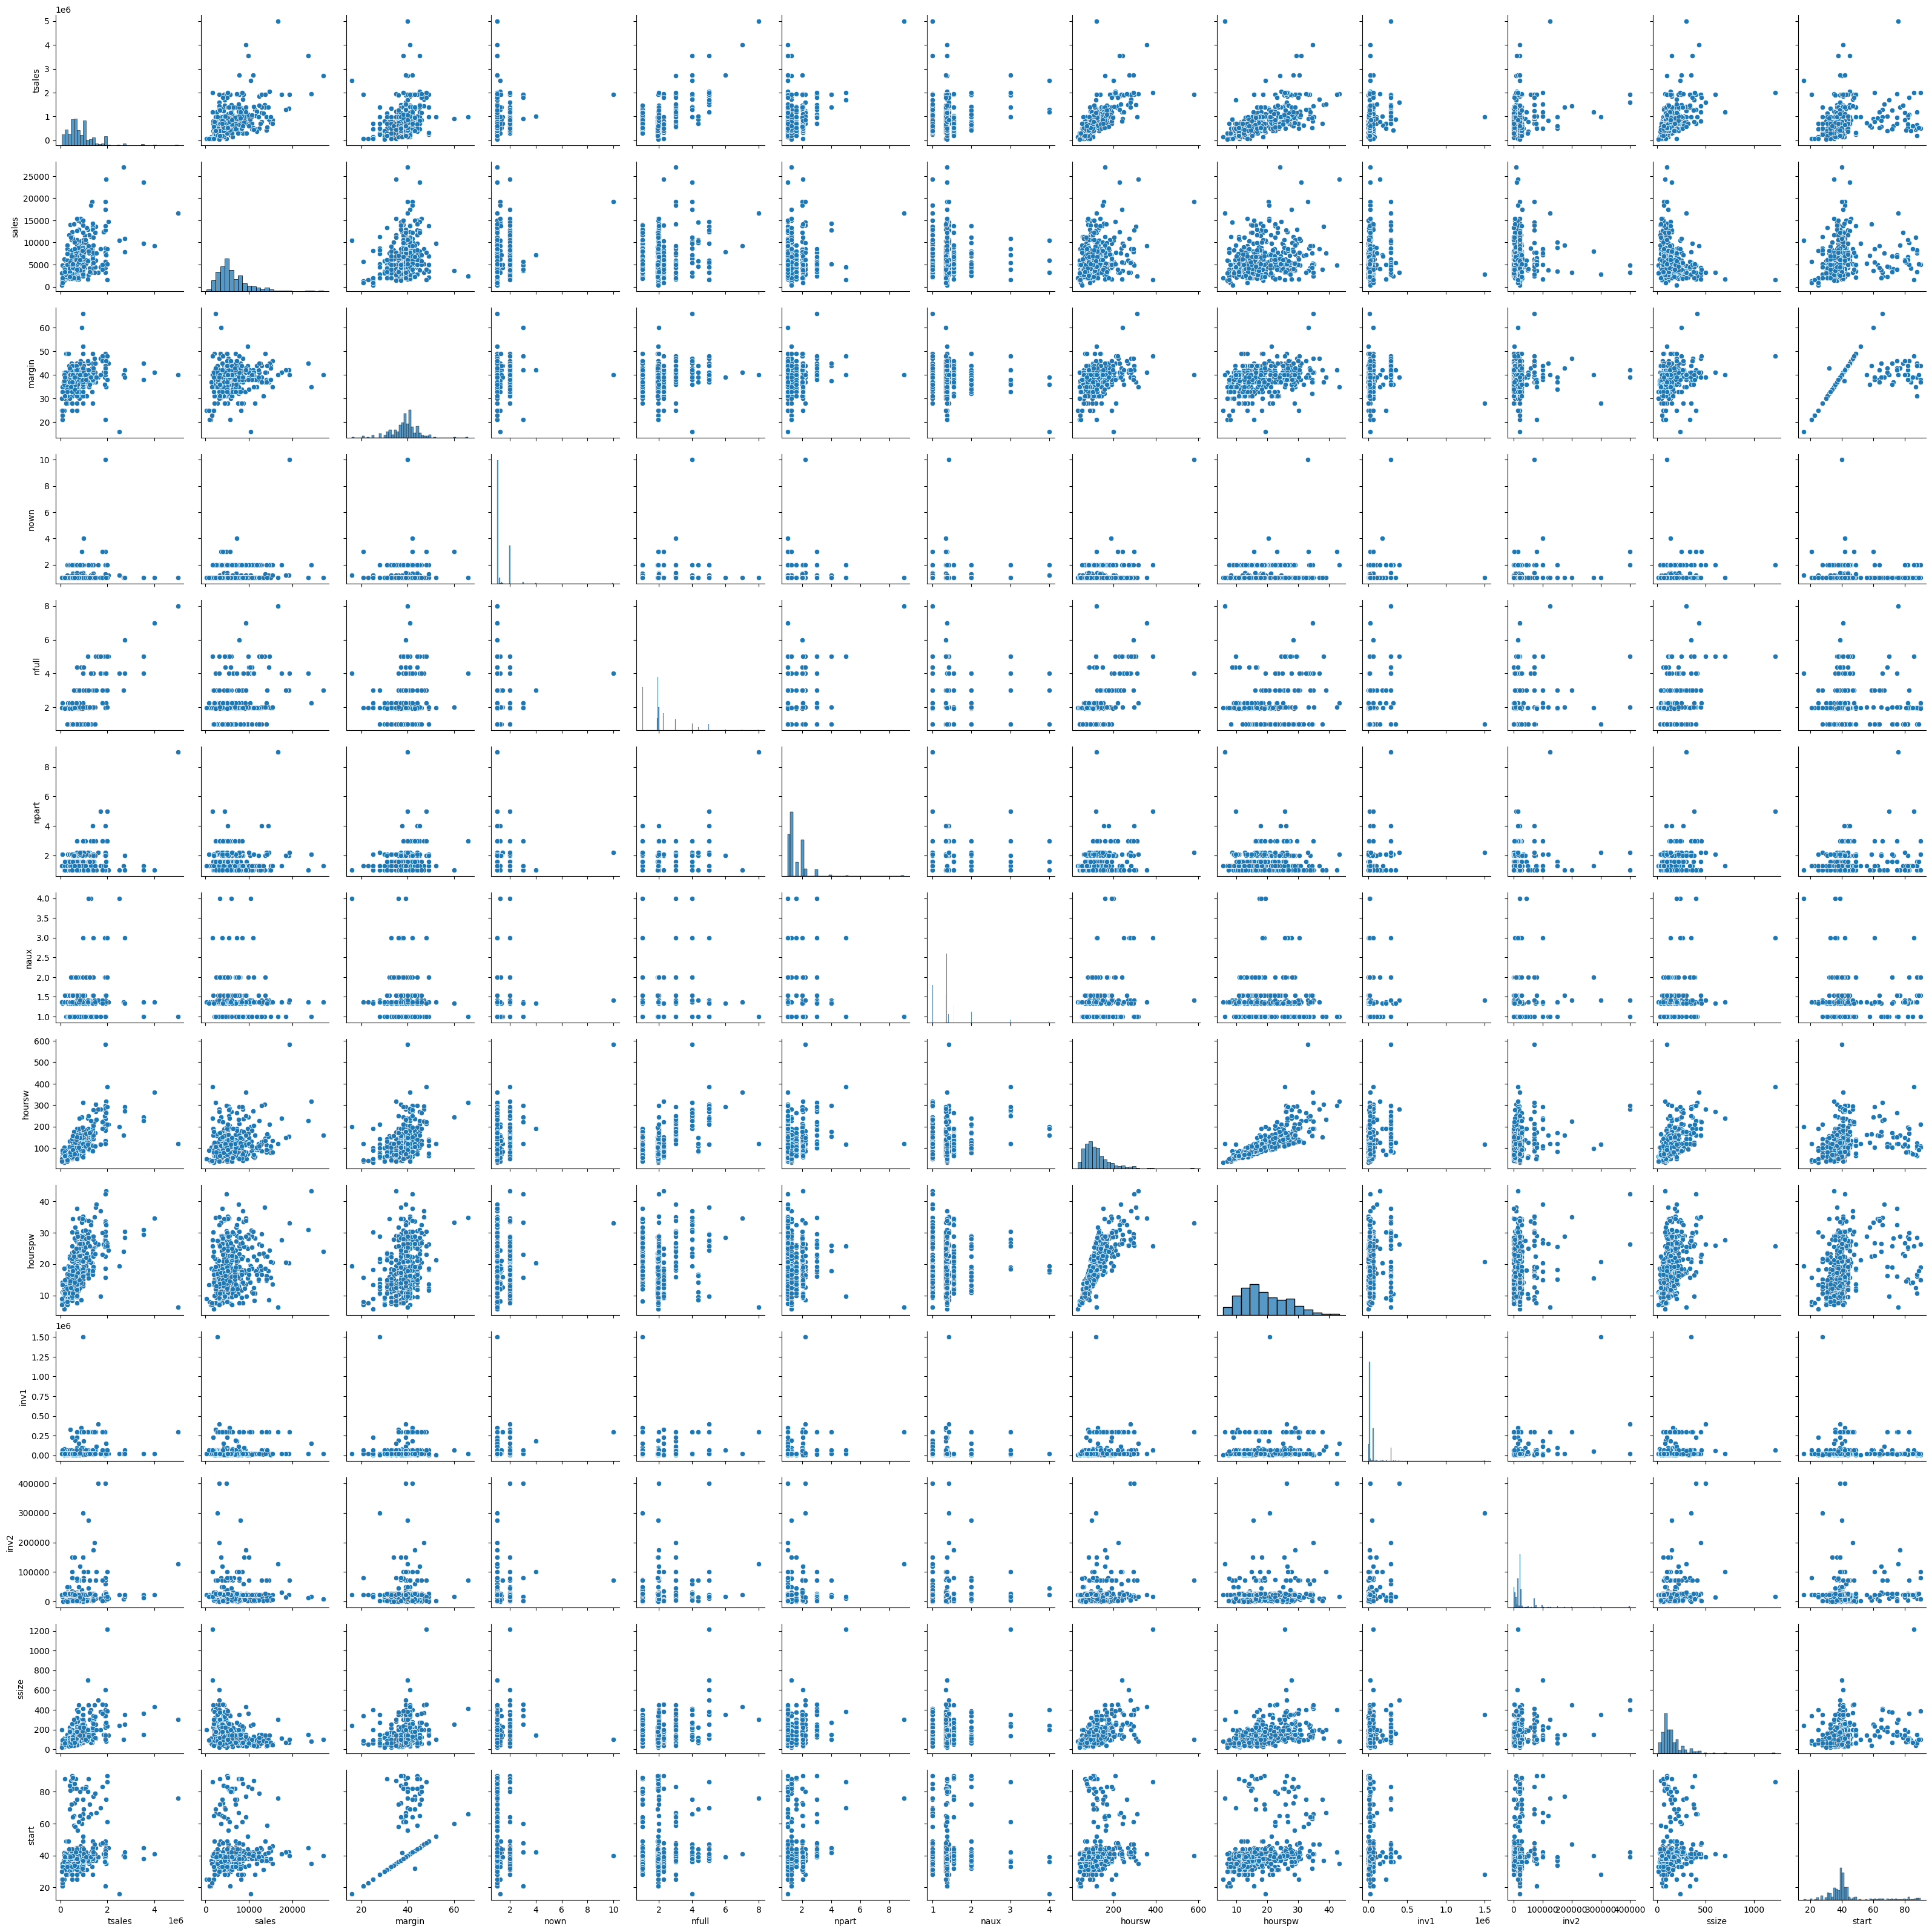

In [ ]:
sns.pairplot(df)

In [ ]:
corr=df.corr()

<Axes: >

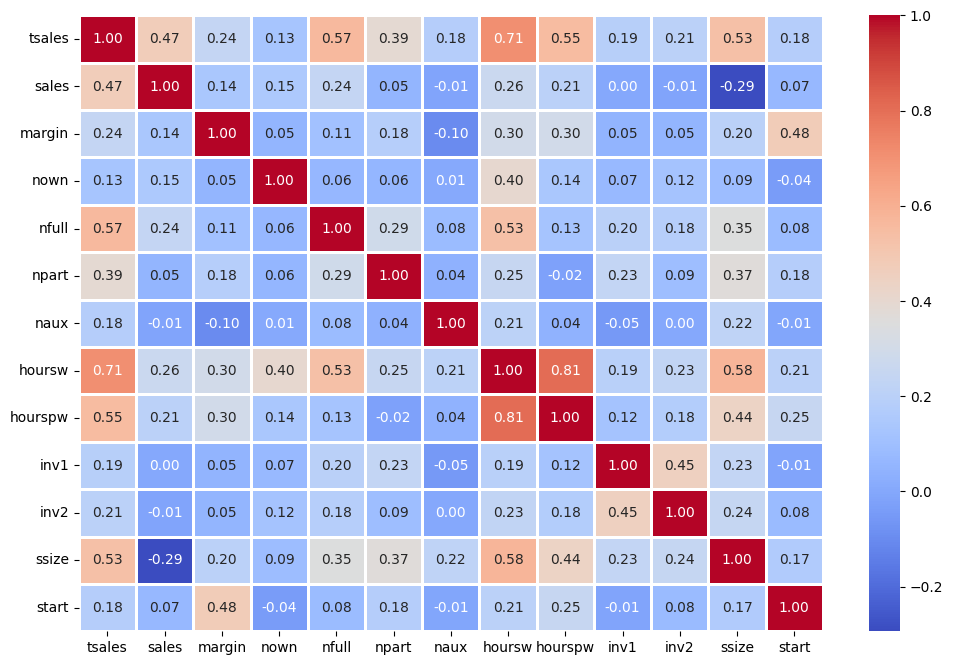

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', linewidth=1, linecolor='white', annot=True, fmt=".2f")

Choose independent variable: tsales

Dependent variable: sales, margin, nown, nfull, npart, naux, hourspw, hoursw, ssize, inv1, inv2, start

multicollinearity: hoursw + hourspw --> high,
tsales=sales×ssize --> perfect multicollinearity

--> elliminate: hoursw, sales (multicollinearity),
PREDICT
,'start','inv1','inv2','naux','nown','margin' <0.25 in correlation table

In [ ]:
X=df.drop(['hoursw','sales','tsales'],axis=1)
X=sm.add_constant(X)
Y=df['tsales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
X_train.head(2)

,const,margin,nown,nfull,npart,naux,hourspw,inv1,inv2,ssize,start
201,1.0,42.0,3.0,2.0,1.0000,1.0000,42.42857,22207.04,400000.0,400,42.0
25,1.0,35.0,1.0,2.0,2.0741,1.3333,19.35262,62269.23,20000.0,160,35.0


In [ ]:
X_train

,const,margin,nown,nfull,npart,naux,hourspw,inv1,inv2,ssize,start
201,1.0,42.0,3.0,2.0000,1.0000,1.0000,42.42857,22207.04,400000.00,400,42.0
25,1.0,35.0,1.0,2.0000,2.0741,1.3333,19.35262,62269.23,20000.00,160,35.0
94,1.0,39.0,1.0,1.9556,2.0000,1.3673,16.44815,22207.04,22859.85,200,39.0
346,1.0,47.0,1.0,3.0000,1.0000,1.4091,34.95031,292857.20,200000.00,450,47.0
121,1.0,37.0,1.0,2.0000,1.2833,1.3673,21.59063,22207.04,1200.00,350,37.0
...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,49.0,1.0,1.9556,1.2833,1.3673,11.59431,22207.04,22859.85,60,49.0
108,1.0,41.0,1.0,1.9556,1.0000,1.3673,11.64779,22207.04,22859.85,60,41.0
245,1.0,41.0,2.0,1.9556,3.0000,1.3673,19.22407,22207.04,5000.00,180,41.0
49,1.0,41.0,1.0,2.2656,1.0000,1.3333,14.28852,8000.00,16624.89,95,41.0


In [ ]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     53.24
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           2.53e-61
Time:                        04:56:48   Log-Likelihood:                -4534.5
No. Observations:                 320   AIC:                             9091.
Df Residuals:                     309   BIC:                             9132.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.112e+06   1.83e+05     -6.067      0.0

6 Variables: 'start','inv1','inv2','naux','nown','margin' insignificant

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

   Variable        VIF
0     const  82.612008
1    margin   1.411655
2      nown   1.042700
3     nfull   1.200104
4     npart   1.360108
5      naux   1.092185
6   hourspw   1.455406
7      inv1   1.352984
8      inv2   1.320458
9     ssize   1.708092
10    start   1.368531


In [ ]:
predictions = model.predict(X_test)
predictions[:4]

,0
270,2.553422e+06
380,1.030746e+06
326,1.009870e+06
60,3.274051e+05


In [ ]:
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE:", round(mape, 2), "%")

MAPE: 49.79 %


INSIGHTS




### Data Overview
The dataset contains sales data from men's fashion stores in the Netherlands, collected in 1990. It includes 400 observations with various attributes such as annual sales, sales per square meter, gross-profit-margin, number of employees, hours worked, investments, and store size.

### Key Variables
- **tsales**: Total annual sales in Dutch guilders.
- **sales**: Sales per square meter.
- **margin**: Gross-profit-margin.
- **nown**: Number of owners (managers).
- **nfull**: Number of full-timers.
- **npart**: Number of part-timers.
- **naux**: Number of helpers (temporary workers).
- **hoursw**: Total number of hours worked.
- **hourspw**: Number of hours worked per worker.
- **inv1**: Investment in shop-premises.
- **inv2**: Investment in automation.
- **ssize**: Sales floor space of the store (in m²).
- **start**: Year the business started.

### Insights from the Analysis
1. **Descriptive Statistics**:
   - The average annual sales (tsales) is approximately 833,584 Dutch guilders.
   - The average sales per square meter (sales) is around 6,334.75 Dutch guilders.
   - The average gross-profit-margin (margin) is 38.77%.

2. **Correlation Analysis**:
   - A heatmap of the correlation matrix shows the relationships between different variables.
   - High multicollinearity was observed between `hoursw` and `hourspw`, and between `tsales` and `sales`.

3. **Regression Analysis**:
   - An Ordinary Least Squares (OLS) regression model was fitted to predict `tsales` using other variables.
   - Significant predictors of `tsales` include the number of full-timers (`nfull`), part-timers (`npart`), helpers (`naux`), and hours worked per worker (`hourspw`).
   - Variables like `margin`, `nown`, `inv1`, `inv2`, `ssize`, and `start` were found to be insignificant in the model.

4. **Variance Inflation Factor (VIF)**:
   - VIF values were calculated to check for multicollinearity.
   - All VIF values were below 2, indicating low multicollinearity among the predictors.

### Visualizations
- **Pairplot**: Visualizes relationships between pairs of variables.
- **Heatmap**: Shows the correlation matrix with color coding to highlight strong correlations.

### Conclusion
The analysis provides a comprehensive understanding of the factors influencing sales in men's fashion stores. Key drivers of sales include the number of employees and the hours worked per worker. Investments in shop-premises and automation, as well as the store size, were not significant predictors of sales.

1.  **Workforce Optimization**: Full-time and part-time workers strongly impact total sales. Increasing full-time staff and optimizing part-time work can improve store performance. Therfore, aim for an approximate full-time:part-time:auxiliary staff ratio of 1.1:1.2:1 for optimal team balance
2. **Productivity**: Higher hours per worker correlate with better sales. Improving efficiency and training may lead to increased revenue.
3.  **Investment in Premises & Automation**: inv1 and inv2 do not significantly predict sales. More research is needed to determine if better store designs or tech upgrades improve performance
4. **Store Footprint**: the age of business does not matter. The year a store started (start) does not significantly impact sales, meaning both new and old businesses have similar opportunities for success.


